In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [19]:
#What are the top 5 zipcodes for 911 calls?

In [20]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [21]:
#What are the top 5 townships (twp) for 911 calls?
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [22]:
#Take a look at the 'title' column, how many unique title codes are there? 
len(df['title'].unique())

110

In [27]:
#In the titles column there are "Reasons/Departments" specified before the
#title code. These are EMS, Fire, and Traffic. Use .apply() with a custom 
#lambda expression to create a new column called "Reason" that contains 
#this string value



In [28]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [29]:
#What is the most common Reason for a 911 call based off of this new column?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

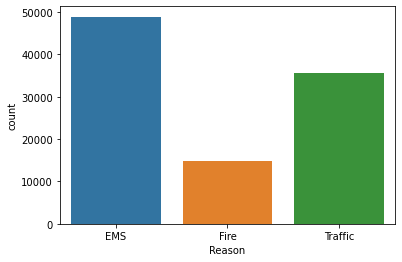

In [32]:
#Now use seaborn to create a countplot of 911 calls by Reason. 

sns.countplot(x='Reason',data=df)

In [34]:
#Now let us begin to focus on time information. What is the data type of 
#the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [36]:
#You should have seen that these timestamps are still strings. Use 
#pd.to_datetime to convert the column from strings to DateTime objects. 

df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [37]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
#You can use Jupyter's tab method to explore the various attributes you 
#can call. Now that the timestamp column are actually DateTime objects, 
#use .apply() to create 3 new columns called Hour, Month, and Day of Week.
#You will create these columns based off of the timeStamp column, reference
#the solutions if you get stuck on this step
time=df['timeStamp'].iloc[0]


In [42]:
time.dayofyear

344

In [43]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [45]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)

In [47]:
df['Day of Week']=df['timeStamp'].apply(lambda time:time.day_of_week)

In [48]:
#Notice how the Day of Week is an integer 0-6. Use the .map() with this 
#dictionary to map the actual string names to the day of the week:

dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [49]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [50]:
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

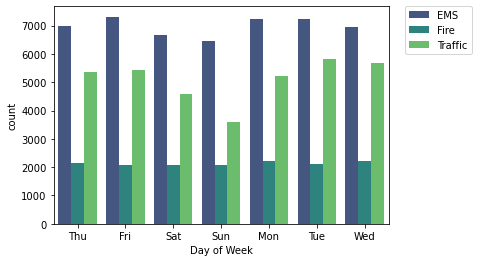

In [55]:
#Now use seaborn to create a countplot of the Day of Week column with 
#the hue based off of the Reason column. 

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

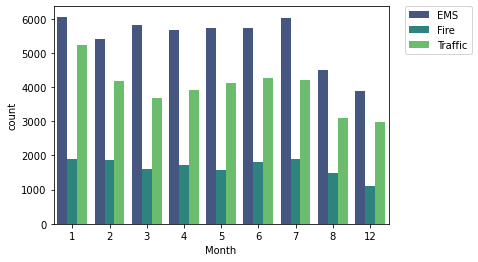

In [56]:
#Now do the same for Month
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [62]:
#Create a gropuby object called byMonth, where you group the DataFrame by
#the month column and use the count() method for aggregation. Use the 
#head() method on this returned DataFrame
byMonth=df.groupby('Month').count()

In [63]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

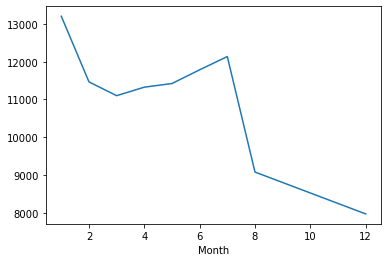

In [64]:
#create a simple plot off of the dataframe indicating the count of calls
#per month
byMonth['lat'].plot()

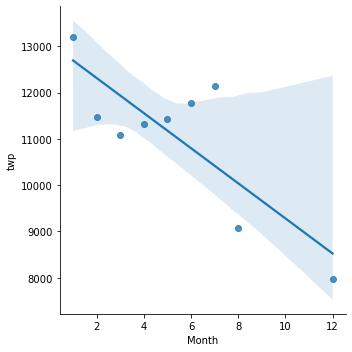

In [65]:
#if you can use seaborn's lmplot() to create a linear fit on the number 
#of calls per month. Keep in mind you may need to reset the index to a 
#column.

sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [67]:
#Create a new column called 'Date' that contains the date from the 
#timeStamp column. You'll need to use apply along with the .date() method
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [68]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

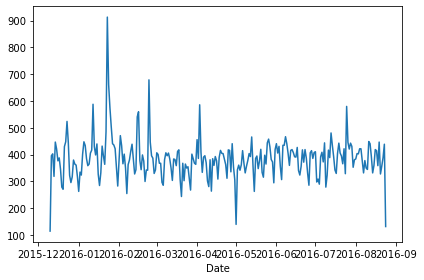

In [72]:
#groupby this Date column with the count() aggregate and create a plot of
#counts of 911 calls

df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

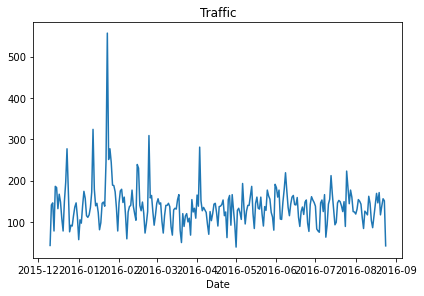

In [74]:
#recreate this plot but create 3 separate plots with each plot representing
#a Reason for the 911 call

df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

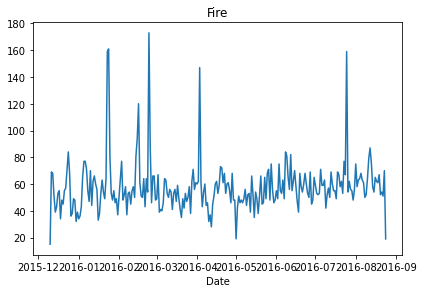

In [75]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

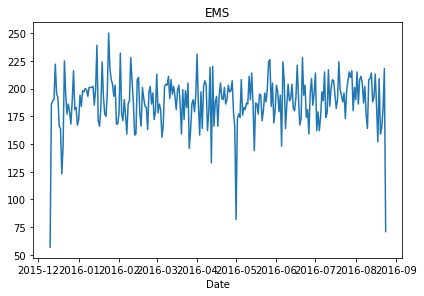

In [76]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

In [87]:
#Now let's move on to creating heatmaps with seaborn and our data. We'll 
#first need to restructure the dataframe so that the columns become the 
#Hours and the Index becomes the Day of the Week. There are lots of ways to
#do this, but I would recommend trying to combine groupby with an unstack 
#method. Reference the solutions if you get stuck on this!

dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

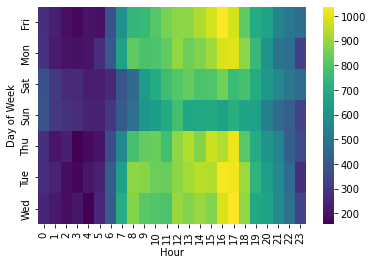

In [88]:
#Now create a HeatMap using this new DataFrame. 

sns.heatmap(dayHour,cmap='viridis')

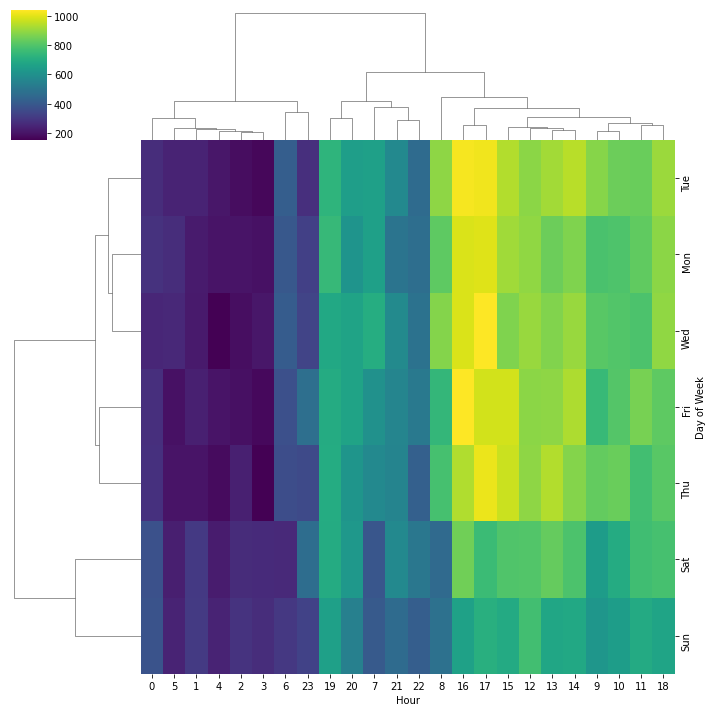

In [89]:
#Now create a clustermap using this DataFrame

sns.clustermap(dayHour,cmap='viridis')

In [90]:
#Now repeat these same plots and operations, for a DataFrame that shows 
#the Month as the column.
dayMonth=df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

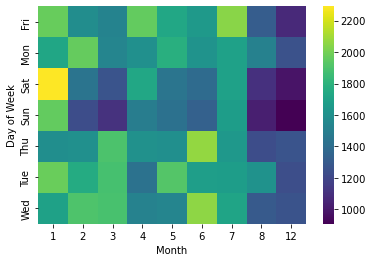

In [92]:
sns.heatmap(dayMonth,cmap='viridis')

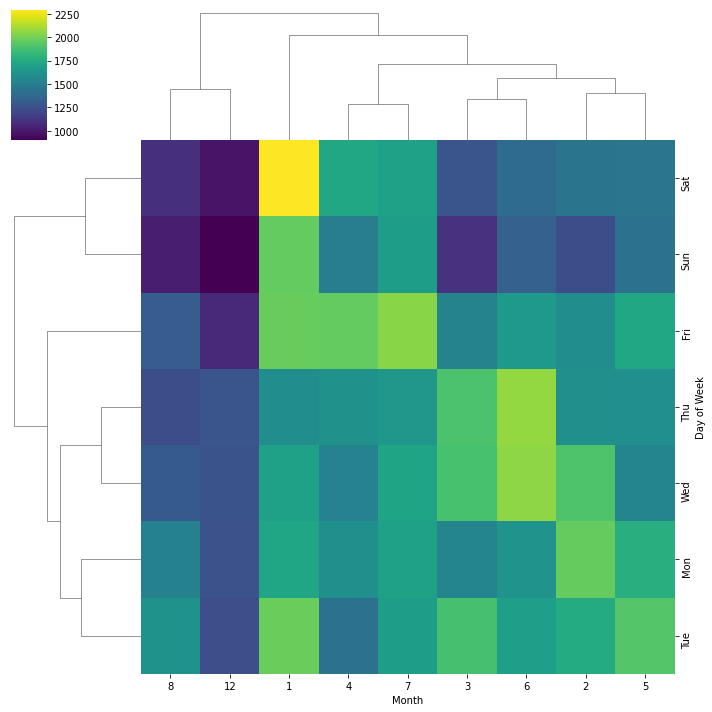

In [93]:
sns.clustermap(dayMonth,cmap='viridis')